# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [4]:
import pandas as pd
ames = pd.read_csv("https://raw.githubusercontent.com/Patriciangugi/dsc-multiple-linear-regression-statsmodels-lab-v2-5/master/ames.csv")

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(ames.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
ames.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [6]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,8450,856,1710,208500
1,9600,1262,1262,181500
2,11250,920,1786,223500
3,9550,961,1717,140000
4,14260,1145,2198,250000
...,...,...,...,...
1455,7917,953,1647,175000
1456,13175,2073,2073,210000
1457,9042,1188,2340,266500
1458,9717,1078,1078,142125


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

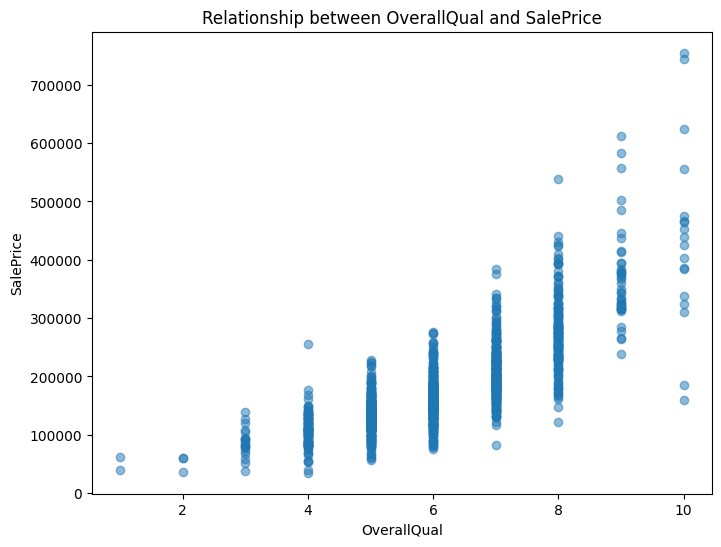

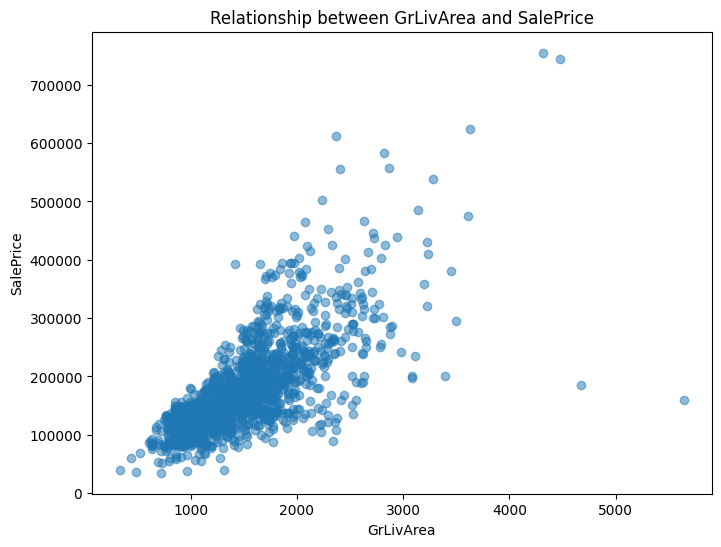

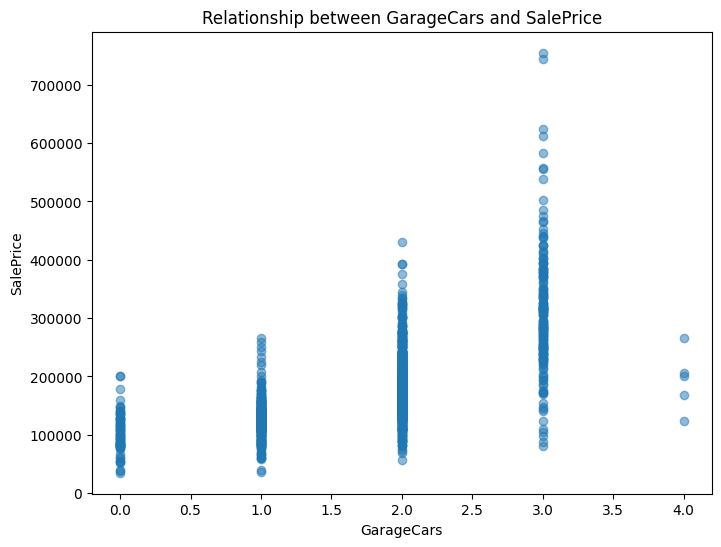

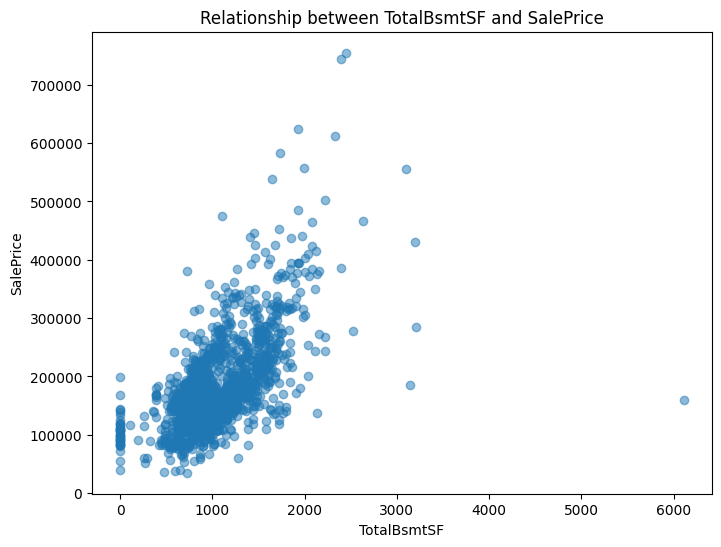

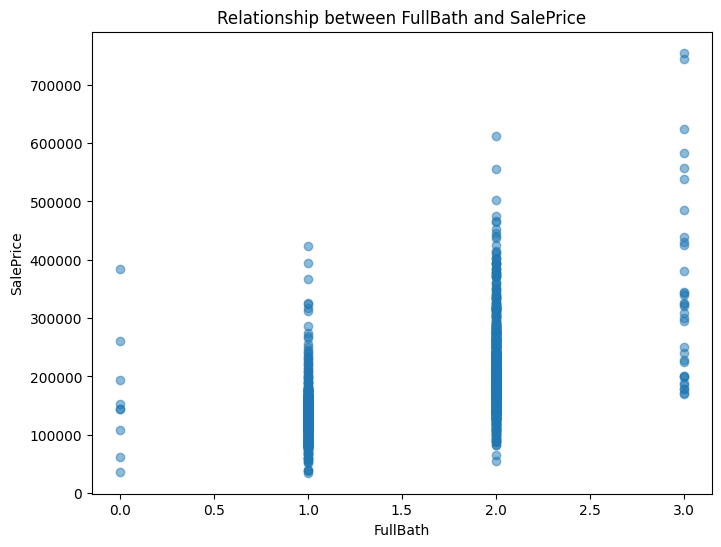

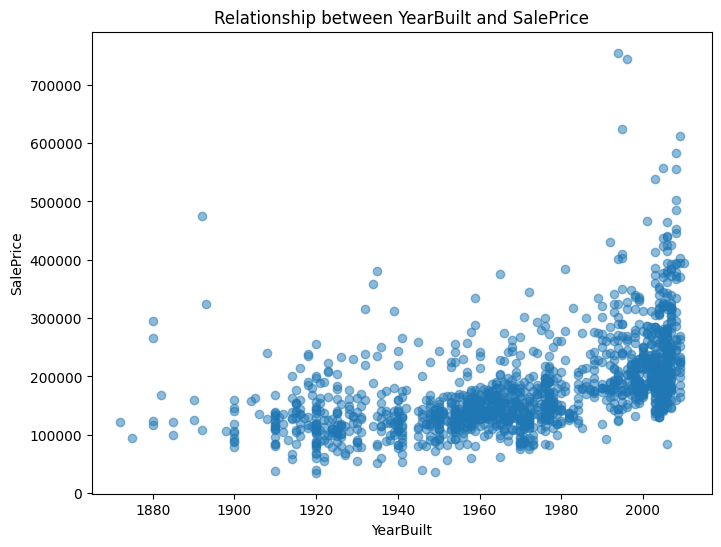

In [7]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt

# List of features to visualize
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# Create scatter plots
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(ames[feature], ames['SalePrice'], alpha=0.5)
    plt.title(f'Relationship between {feature} and SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [8]:
# Your written answer here - do these seem like good candidates for linear regression?

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [9]:
# Your code here - define y and baseline X
import statsmodels.api as sm

# Define the dependent variable (SalePrice) and the baseline independent variable (GrLivArea)
y = ames['SalePrice']
X = ames['GrLivArea']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Build and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          4.52e-223
Time:                        04:11:46   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [10]:
# Your code here - import StatsModels, fit baseline model, display results

In [11]:
# Your written answer here - interpret model results

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [12]:
# Your code here - define X
y = ames['SalePrice']

# Define the features (X) - using all columns except 'SalePrice'
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = ames[features]

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Build and fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     804.6
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        04:17:41   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1453   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.377e+05   9.05e+04     -8.154      

In [ ]:
# Your code here - fit model and display results

In [13]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?
If the multiple linear regression model has a higher R-squared and Adjusted R-squared compared to the simple model, it generally suggests that the multiple model is better at explaining the variability in SalePrice. However, be cautious of overfitting with too many features and check whether all predictors are significant. Additionally, ensure the model assumptions are met and consider regularization techniques if needed.

In summary, the multiple linear regression model usually provides a more nuanced view of the relationships between features and the target variable, potentially offering better predictive performance compared to a simple linear regression model.

SyntaxError: invalid syntax (2931806530.py, line 2)

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

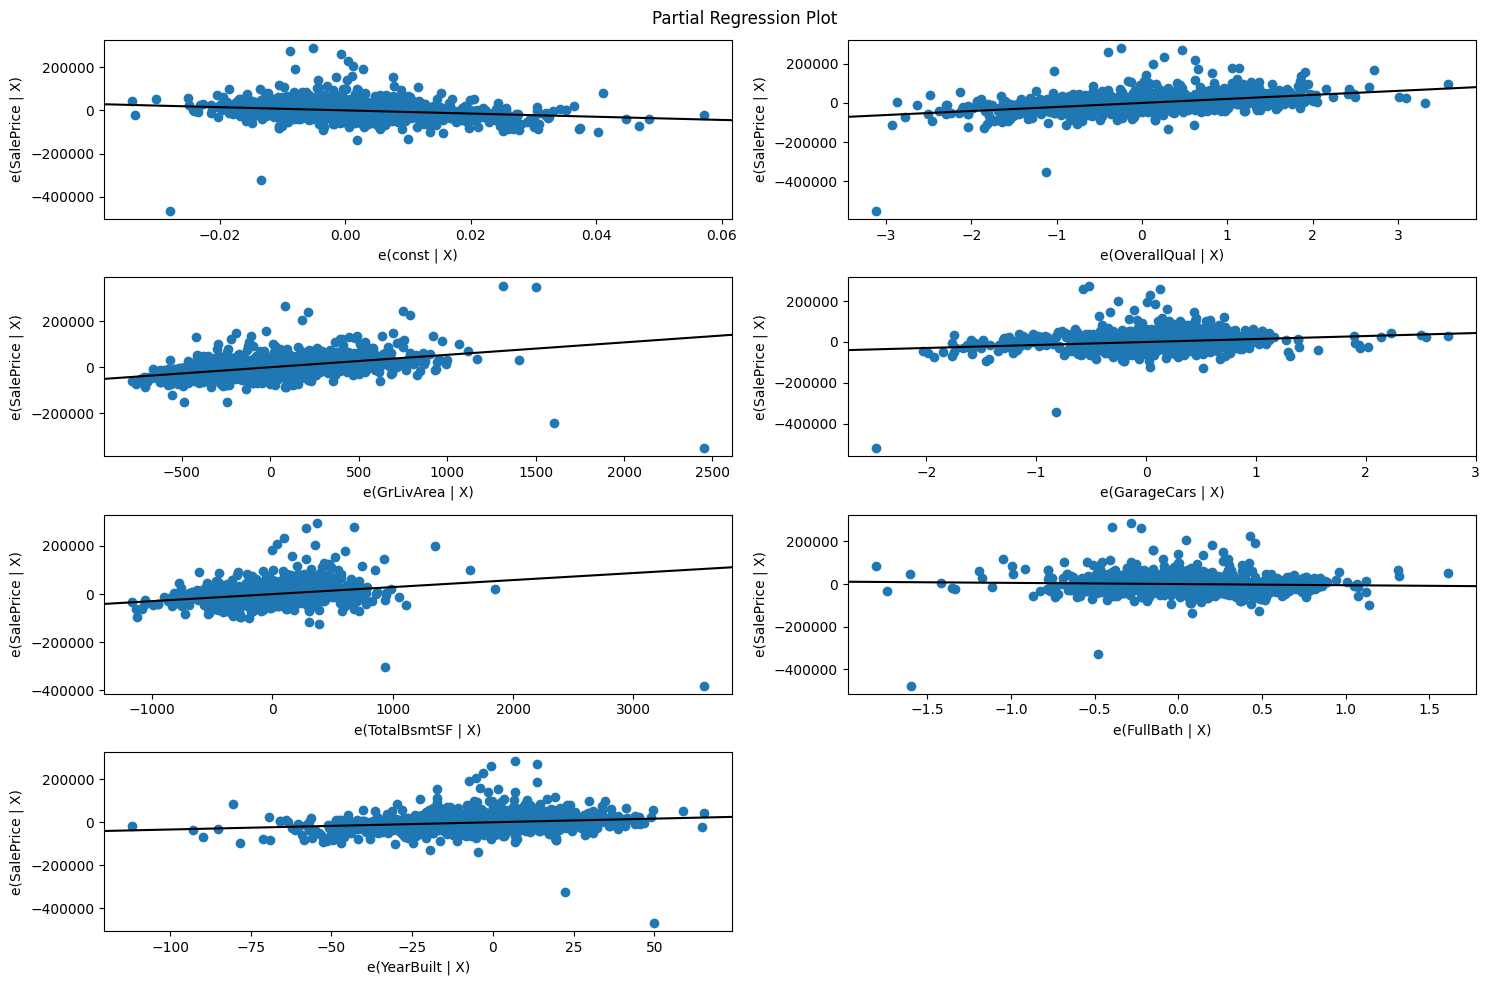

In [14]:
# Your code here - create partial regression plots for each predictor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_partregress_grid

y = ames['SalePrice']
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = ames[features]

# Add a constant to the features for the intercept
X = sm.add_constant(X)

# Build and fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Create partial regression plots
fig = plt.figure(figsize=(15, 10))
plot_partregress_grid(model, fig=fig)
plt.show()

In [ ]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

Partial Regression Plots: Each plot shows the relationship between one predictor and SalePrice while accounting for the influence of other predictors.
The x-axis represents the residuals of the predictor (after accounting for other predictors).
The y-axis represents the residuals of SalePrice (after accounting for other predictors).
Interpretation:
If a partial regression plot shows a clear linear relationship, it suggests that the predictor is a strong contributor to the model.
If there is little or no pattern, the predictor might not be contributing much to the model or might need further transformation.

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [15]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the target variable (SalePrice) and the features
y = ames['SalePrice']
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = ames[features]

# Add a constant to the features for the intercept (similar to adding a constant in statsmodels)
X = sm.add_constant(X)  # Include intercept term

# Create and fit the scikit-learn linear regression model
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Get the R-squared score
y_pred = model_sklearn.predict(X)
r2 = r2_score(y, y_pred)

# Get the coefficients
coefficients = model_sklearn.coef_

# Print results
print(f"R-squared: {r2}")
print(f"Coefficients: {coefficients}")

# Print the intercept
print(f"Intercept: {model_sklearn.intercept_}")

R-squared: 0.7686473354220852
Coefficients: [    0.         20519.96877576    54.07582887 14646.31581341
    29.18210823 -5503.97370911   336.54674956]
Intercept: -737736.0584928206


In [16]:
# Your code here - compare R-Squared
y = ames['SalePrice']
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = ames[features]

# Add a constant to the features for the intercept
X_with_const = sm.add_constant(X)

# Fit the statsmodels OLS model
model_sm = sm.OLS(y, X_with_const).fit()

# Get R-squared from statsmodels
r2_sm = model_sm.rsquared

# Create and fit the scikit-learn linear regression model
model_sklearn = LinearRegression()
model_sklearn.fit(X_with_const, y)

# Get R-squared from scikit-learn
y_pred_sklearn = model_sklearn.predict(X_with_const)
r2_sklearn = r2_score(y, y_pred_sklearn)

# Print R-squared values for comparison
print(f"R-squared from statsmodels: {r2_sm}")
print(f"R-squared from scikit-learn: {r2_sklearn}")

R-squared from statsmodels: 0.7686473354220852
R-squared from scikit-learn: 0.7686473354220852


In [17]:
# Your code here - compare intercept and coefficients
import numpy as np

y = ames['SalePrice']
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = ames[features]

# Add a constant to the features for the intercept
X_with_const = sm.add_constant(X)

# Fit the statsmodels OLS model
model_sm = sm.OLS(y, X_with_const).fit()

# Extract the intercept and coefficients from statsmodels
intercept_sm = model_sm.params['const']
coefficients_sm = model_sm.params[features]

# Create and fit the scikit-learn linear regression model
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Extract the intercept and coefficients from scikit-learn
intercept_sklearn = model_sklearn.intercept_
coefficients_sklearn = model_sklearn.coef_

# Print the intercept and coefficients for comparison
print("Statsmodels Model:")
print(f"Intercept: {intercept_sm}")
print("Coefficients:")
for feature, coef in coefficients_sm.items():
    print(f"{feature}: {coef}")

print("\nScikit-learn Model:")
print(f"Intercept: {intercept_sklearn}")
print("Coefficients:")
for feature, coef in zip(features, coefficients_sklearn):
    print(f"{feature}: {coef}")

Statsmodels Model:
Intercept: -737736.058492801
Coefficients:
OverallQual: 20519.968775758563
GrLivArea: 54.075828870768234
GarageCars: 14646.315813405481
TotalBsmtSF: 29.182108227385
FullBath: -5503.973709112549
YearBuilt: 336.54674956148597

Scikit-learn Model:
Intercept: -737736.0584928239
Coefficients:
OverallQual: 20519.968775757243
GrLivArea: 54.07582887077281
GarageCars: 14646.31581340451
TotalBsmtSF: 29.182108227387538
FullBath: -5503.973709112522
YearBuilt: 336.54674956149404


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.